### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
# Open the .csv files
X_train = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/train_tfidf.csv')
X_test = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/test_tfidf.csv')

X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = X_test.drop(['Unnamed: 0'], axis=1)

# Check the shape of the data
print(X_train.shape)
print(X_test.shape)

(22500, 1000)
(7500, 1000)


In [27]:
# Extract the features into a numpy array
X_train = X_train.values
X_test = X_test.values

In [4]:
# Open the labels
y_train_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/train_labels.csv')
y_test_df = pd.read_csv('/Users/arnav/Desktop/MachineLearning/ML_CSE343 Project/CSE343-ML-Project/Data/Preprocessed-Data/test_labels.csv')

# Check the shape of the labels
print(y_train_df.shape)
print(y_test_df.shape)

(22500, 1)
(7500, 1)


In [5]:
# Convert class to non_suicide = 0 and suicide = 1
y_train_temp = y_train_df['class'].values
y_test_temp = y_test_df['class'].values

# Check the shape of the labels
print(y_train_temp.shape)
print(y_test_temp.shape)

(22500,)
(7500,)


In [6]:
# Making the Labels Numeric
y_train = np.array([0 if label == "non-suicide" else 1 for label in y_train_temp])
y_test = np.array([0 if label == "non-suicide" else 1 for label in y_test_temp])

# Check the shape of the labels
print(y_train.shape)
print(y_test.shape)


(22500,)
(7500,)


In [7]:
# Standard Preprocessing
# Check the mean and standard deviation of the data
print(np.mean(X_train), np.std(X_train))

0.004686103127390068 0.0312074847455884


### Without Hyperparameter Tuning

In [8]:
# Logistic Regression
lr_base = LogisticRegression()

# Fit
lr_base.fit(X_train, y_train)

# Predict
y_pred = lr_base.predict(X_test)

In [10]:
# Print the accuracy
print("Base Logistic Regression: Test Data")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Base Logistic Regression: Test Data
Accuracy: 0.9150666666666667
Confusion Matrix:
[[3429  279]
 [ 358 3434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3708
           1       0.92      0.91      0.92      3792

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500

AUC Score: 0.9151739994264881
Weighted F1-score: 0.9150672630876725


In [11]:
# Predict on training data
y_pred_train = lr_base.predict(X_train)

# Print the accuracy
print("Base Logistic Regression: Training Data")
print("Accuracy:", accuracy_score(y_train, y_pred_train))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))

# Print the classification report
print("Classification Report:")
print(classification_report(y_train, y_pred_train))

# Print AUC score
print("AUC Score:", roc_auc_score(y_train, y_pred_train))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

Base Logistic Regression: Training Data
Accuracy: 0.9210666666666667
Confusion Matrix:
[[10549   743]
 [ 1033 10175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11292
           1       0.93      0.91      0.92     11208

    accuracy                           0.92     22500
   macro avg       0.92      0.92      0.92     22500
weighted avg       0.92      0.92      0.92     22500

AUC Score: 0.9210174473068803
Weighted F1-score: 0.9210497511596902


In [12]:
# Perform Grid Search to find the best parameters for Logistic Regression

# Define hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Initialize Logistic Regression
clf = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.6s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.7s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.6s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.7s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.7s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.6s
[CV] END ...............C=0.01, penalty=l1, solver=newton-cg; total time=   0.7s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ...............C=0.01, penalty=l1, sol

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Fra

[CV] END .....................C=100, penalty=l1, solver=saga; total time= 7.2min


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             verbose=2)

In [13]:
# Best hyperparameters
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [18]:
# Best Model
lr_best = LogisticRegression(max_iter=1000, C=best_parameters['C'], penalty=best_parameters['penalty'], solver=best_parameters['solver'])

# Fit the best model    
lr_best.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_test_best = lr_best.predict(X_test)

In [16]:
# Print the accuracy
print("Best Logistic Regression: Test Data")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Best Logistic Regression: Test Data
Accuracy: 0.9150666666666667
Confusion Matrix:
[[3429  279]
 [ 358 3434]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3708
           1       0.92      0.91      0.92      3792

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500

AUC Score: 0.9151739994264881
Weighted F1-score: 0.9150672630876725


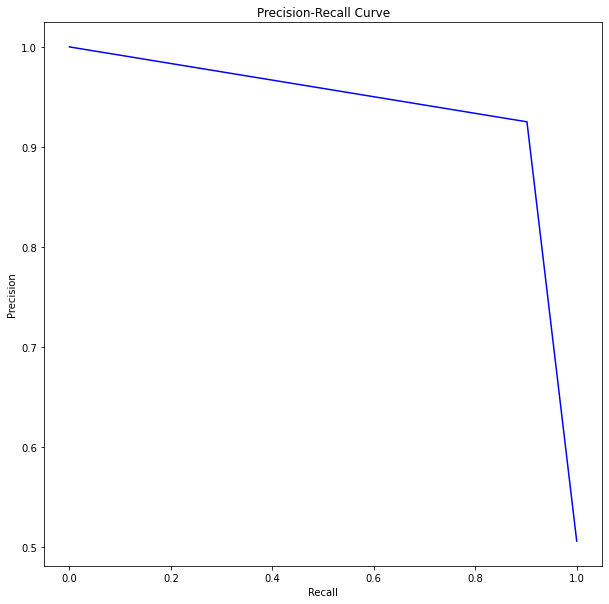

In [35]:
# Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.title('Precision-Recall Curve')
plt.plot(recall, precision, 'b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [17]:
# Training Data
# Predict the labels of the training set
y_pred_train_best = lr_best.predict(X_train)

# Print the accuracy
print("Best Logistic Regression: Training Data")
print("Accuracy:", accuracy_score(y_train, y_pred_train_best))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_best))

# Print the classification report
print("Classification Report:")
print(classification_report(y_train, y_pred_train_best))

# Print AUC score
print("AUC Score:", roc_auc_score(y_train, y_pred_train_best))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_train, y_pred_train_best, average='weighted'))

Best Logistic Regression: Training Data
Accuracy: 0.9211111111111111
Confusion Matrix:
[[10549   743]
 [ 1032 10176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11292
           1       0.93      0.91      0.92     11208

    accuracy                           0.92     22500
   macro avg       0.92      0.92      0.92     22500
weighted avg       0.92      0.92      0.92     22500

AUC Score: 0.9210620582990289
Weighted F1-score: 0.921094308497212


### Principal Component Analysis

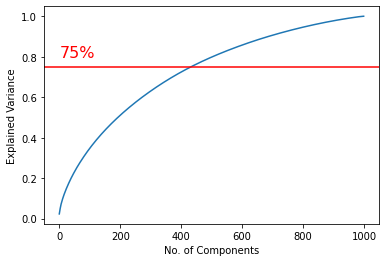

In [23]:
# Plot No. of Components vs. Explained Variance and mark at 75% explained variance
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.text(0.5, 0.8, '75%', color = 'red', fontsize=16)
plt.show()

In [24]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.75) + 1
print("No. of Components:", n_components)

No. of Components: 434


In [28]:
# Perform PCA on the data and extract the features that explain 85% of the variance
pca = PCA(n_components=0.75)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
print(X_train_pca.shape)

(22500, 434)


In [31]:
# Run Logistic Regression 
# Initialize Logistic Regression
lr_pca = LogisticRegression(max_iter=1000, C=best_parameters['C'], penalty=best_parameters['penalty'], solver=best_parameters['solver'])

# Fit the model on the training data
lr_pca.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_test_pca = lr_pca.predict(X_test_pca)

In [33]:
# Print the accuracy score
print("Logistic Regression with PCA: Test Data")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

Logistic Regression with PCA: Test Data
Accuracy Score: 0.9134666666666666
Confusion Matrix:
 [[3431  277]
 [ 372 3420]]
AUC Score: 0.9135976950281977
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      3708
           1       0.93      0.90      0.91      3792

    accuracy                           0.91      7500
   macro avg       0.91      0.91      0.91      7500
weighted avg       0.91      0.91      0.91      7500

Weighted F1-score: 0.9134650590661715


In [34]:
# Training Data
# Predict on the training data
y_pred_train_pca = lr_pca.predict(X_train_pca)

# Print the accuracy score
print("Logistic Regression with PCA: Training Data")
print("Accuracy Score:", accuracy_score(y_train, y_pred_train_pca))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_pca))

# Print AUC score
print("AUC Score:", roc_auc_score(y_train, y_pred_train_pca))

# Print the classification report
print("Classification Report:\n", classification_report(y_train, y_pred_train_pca))

# Print weighted F1-score
print("Weighted F1-score:", f1_score(y_train, y_pred_train_pca, average='weighted'))

Logistic Regression with PCA: Training Data
Accuracy Score: 0.9144
Confusion Matrix:
 [[10468   824]
 [ 1102 10106]]
AUC Score: 0.9143526788592632
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     11292
           1       0.92      0.90      0.91     11208

    accuracy                           0.91     22500
   macro avg       0.91      0.91      0.91     22500
weighted avg       0.91      0.91      0.91     22500

Weighted F1-score: 0.9143829794132429
